In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
file_path = r"C:\Users\Dell\Desktop\Omdena\forsestfire_ml\data\processed\combined_fire_climate.csv"
df = pd.read_csv(file_path)




Temperature Trends Across Regions

In [4]:
file_path=r"C:\Users\Dell\Desktop\Omdena\forsestfire_ml\data\processed\flitered_climate_data.csv"
df_climate=pd.read_csv(file_path)

In [5]:
df_climate

YEAR  MONTH      DISTRICT   LAT   LON    Prep  AvgTemp  MaxTemp  \
0     2012      1  Arghakhanchi  27.9  83.2   36.46    12.78    19.09   
1     2012      2  Arghakhanchi  27.9  83.2   10.93    16.40    23.90   
2     2012      3  Arghakhanchi  27.9  83.2   17.71    20.72    28.99   
3     2012      4  Arghakhanchi  27.9  83.2   14.04    26.91    34.38   
4     2012      5  Arghakhanchi  27.9  83.2    7.53    30.94    38.31   
...    ...    ...           ...   ...   ...     ...      ...      ...   
4459  2017      8      Udayapur  26.9  86.5  319.82    26.48    29.18   
4460  2017      9      Udayapur  26.9  86.5  140.47    25.77    28.63   
4461  2017     10      Udayapur  26.9  86.5   56.04    23.94    27.95   
4462  2017     11      Udayapur  26.9  86.5    0.37    20.36    25.92   
4463  2017     12      Udayapur  26.9  86.5    0.00    17.58    24.30   

      Humidity  WindSpeed  
0        51.21       2.23  
1        39.39       2.85  
2        28.13       3.04  
3        27.54       3.61  
4        19.34       3.14  
...        ...        ...  
4459     88.33       2.40  
4460     88.90       2.41  
4461     77.69       1.93  
4462     64.21       1.69  
4463     52.85       1.68  

[4464 rows x 10 columns]

Visualize Temperature Trend 

In [ ]:
# Filter the data for the years 2012 to 2017
df_filtered = df_climate[(df_climate['YEAR'] >= 2012) & (df['YEAR'] <= 2017)]

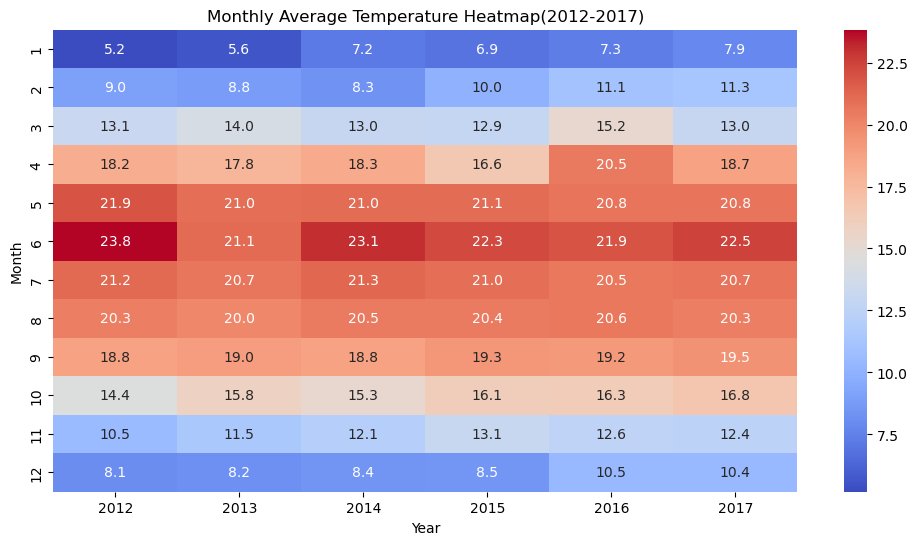

In [ ]:
# Create pivot table for AvgTemp over years and months
pivot_df = df_filtered.pivot_table(index='MONTH', columns='YEAR', values='AvgTemp')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Monthly Average Temperature Heatmap(2012-2017)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [20]:
import plotly.express as px

# Shift all values to be non-negative (e.g., by adding the absolute minimum)
min_temp = df_filtered["MaxTemp"].min()
df_filtered["SizeTemp"] = df_filtered["MaxTemp"] + abs(min_temp) + 1  # +1 to avoid zero size

fig = px.scatter_mapbox(
    df_filtered,
    lat="LAT",
    lon="LON",
    size="SizeTemp",  # Use adjusted size column
    color="MaxTemp",  # Original values can still be used for color
    animation_frame="MONTH",
    hover_name="DISTRICT",
    size_max=15,
    zoom=5,
    mapbox_style="open-street-map",
    title="Monthly Maximum Temperature Variation Across Districts of Nepal (2012-2017)",
    color_continuous_scale="Reds"
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    sliders=[{"currentvalue": {"prefix": "Month: "}}],
)

fig.show()


Humidity Trend Visualization 

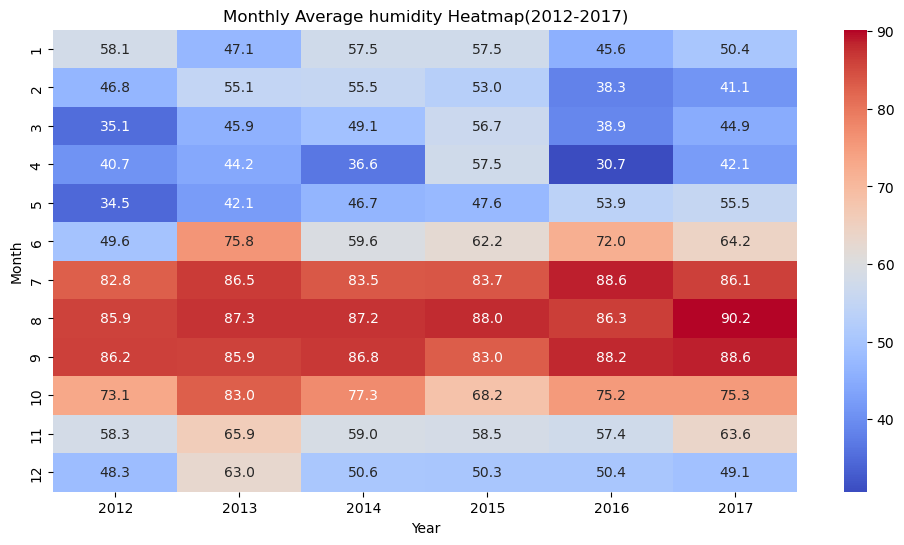

In [7]:

# Create pivot table for Humidity over years and months
pivot_df = df_filtered.pivot_table(index='MONTH', columns='YEAR', values='Humidity')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Monthly Average humidity Heatmap(2012-2017)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [8]:
import plotly.express as px

fig = px.box(df_filtered, 
             x='MONTH', 
             y='Humidity',
             color='MONTH',
             title='Monthly Humidity Distribution (2012-2017)',
             labels={'MONTH': 'Month', 'Humidity': 'Relative Humidity (%)'})
fig.update_layout(xaxis={'tickvals': list(range(1,13)),
                   'ticktext': ['Jan','Feb','Mar','Apr','May','Jun',
                                'Jul','Aug','Sep','Oct','Nov','Dec']})
fig.show()

Shows how humidity varies seasonally -  higher values during monsoon months (Jun-Sep).

In [7]:
fig = px.scatter_mapbox(
    df_filtered,
    lat='LAT',
    lon='LON',
    color='Humidity',
    size='Humidity',
    size_max=15,
    animation_frame='MONTH',
    hover_name='DISTRICT',
    hover_data={'Humidity': ':.1f%', 'MONTH': True},
    zoom=5,  
    center={'lat': 27.7172, 'lon': 85.3240},  # Centered near Kathmandu
    title='Monthly Humidity Variation Across Nepal(2012-2017)',
    color_continuous_scale='Blues',
    range_color=[df['Humidity'].min(), df['Humidity'].max()],
    height=600  # Increased height
)

# Set map boundaries to Nepal's extent
fig.update_layout(
    mapbox_style="open-street-map",
    
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

Monthly Wind Speed Variation Across Districts(2014-2019)

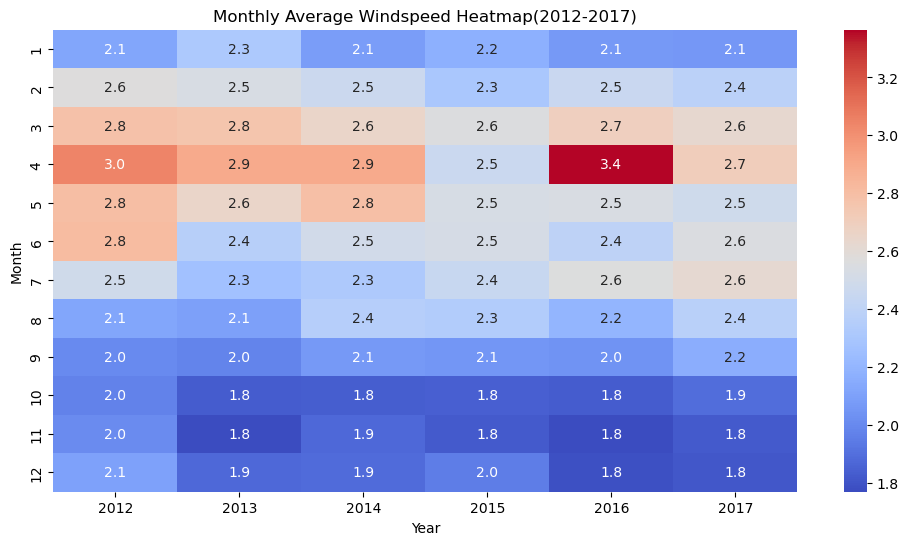

In [57]:

# Create pivot table for Humidity over years and months
pivot_df = df_filtered.pivot_table(index='MONTH', columns='YEAR', values='WindSpeed')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Monthly Average Windspeed Heatmap(2012-2017)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [10]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_filtered,
    lat="LAT",
    lon="LON",
    size="WindSpeed",
    color="WindSpeed",
    animation_frame="MONTH",
    hover_name="DISTRICT",
    size_max=15,
    zoom=5,
    mapbox_style="open-street-map",
    title="Monthly Wind Speed Variation Across Districts(2012-2017)",
    color_continuous_scale="Viridis",  
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    sliders=[{"currentvalue": {"prefix": "Month: "}}],
)

fig.show()


Precipitation trends

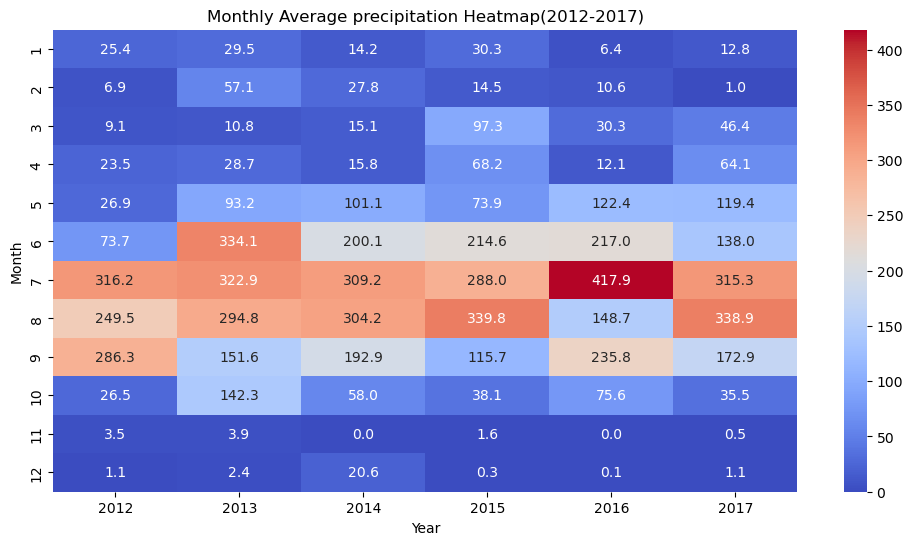

In [58]:

# Create pivot table for Humidity over years and months
pivot_df = df_filtered.pivot_table(index='MONTH', columns='YEAR', values='Prep')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Monthly Average precipitation Heatmap(2012-2017)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [11]:
import plotly.express as px

fig = px.box(df_filtered, 
             x='MONTH', 
             y='Prep',
             color='MONTH',
             title='Monthly Precipitation Distribution (2012-2017)',
             labels={'MONTH': 'Month', 'Prep': 'Precipitation (mm)'})
fig.update_layout(xaxis={'tickvals': list(range(1,13)),
                   'ticktext': ['Jan','Feb','Mar','Apr','May','Jun',
                                'Jul','Aug','Sep','Oct','Nov','Dec']})
fig.show()

In [12]:
fig = px.scatter_mapbox(df_filtered,
                        lat='LAT',
                        lon='LON',
                        color='Prep',
                        size=[8]*len(df),
                        size_max=8,  # Fixed marker size
                        animation_frame='MONTH',
                        hover_name='DISTRICT',
                        hover_data={'Prep':':.1f mm'},
                        zoom=5,
                        center={'lat':28.0, 'lon':84.0},
                        title='Monthly Precipitation Across Districts(2012-2017)',
                        color_continuous_scale='Blues',
                        range_color=[0, df['Prep'].max()])
fig.update_layout(mapbox_style="open-street-map",
                 margin={"r":0,"t":40,"l":0,"b":0})

In [28]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv(r"C:\Users\Dell\Desktop\Omdena\forsestfire_ml\data\processed\combined_fire_climate.csv")

# Step 1: Aggregate by District
district_risk = df.groupby("DISTRICT").agg({
    "LAT": "mean",
    "LON": "mean",
    "Confidence": "mean",
    "FRP": "mean",
    "Fire_Count": "sum"
}).reset_index()

# Step 2: Create a synthetic 'FireRisk' score
district_risk["FireRisk"] = (district_risk["Confidence"] + district_risk["FRP"] + district_risk["Fire_Count"]) / 3

# Step 3: Classify into Risk Levels using quantiles
district_risk['RiskLevel'] = pd.qcut(
    district_risk['FireRisk'],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Step 4: Visualize
fig = px.scatter_mapbox(
    district_risk,
    lat="LAT",
    lon="LON",
    color="RiskLevel",
    size="FireRisk",
    hover_name="DISTRICT",
    zoom=5,
    mapbox_style="open-street-map",
    title="Forest Fire Risk Classification by District (Quantile-Based)",
    category_orders={"RiskLevel": ["Low", "Medium", "High"]},
    color_discrete_map={
        "Low": "#ff9999",
        "Medium": "#ff4d4d",
        "High": "#990000"
    }
)

fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
fig.show()


FireData Visualization

In [ ]:
file_path=r"C:\Users\Dell\Desktop\Omdena\forsestfire_ml\data\processed\filtered_fire_with_location.csv"
df_fire=pd.read_csv(file_path)

In [ ]:
df_fire

YEAR  MONTH       DISTRICT  Brightness  Confidence  ThermalData    FRP  \
0     2012      1        bardiya  313.650000   74.000000   291.350000   96.6   
1     2012      1       chitawan  317.728571   67.142857   292.457143  221.0   
2     2012      1          dolpa  314.487500   55.250000   292.150000  179.0   
3     2012      1         gorkha  314.300000   60.600000   288.980000  345.5   
4     2012      1       jajarkot  303.633333   32.333333   288.100000   30.1   
...    ...    ...            ...         ...         ...          ...    ...   
1603  2017     12        sarlahi  303.900000   50.000000   293.900000    4.0   
1604  2017     12  sindhupalchok  310.250000   59.000000   288.300000   72.3   
1605  2017     12     solukhumbu  306.440000   42.600000   289.020000  214.3   
1606  2017     12        syangja  303.300000   29.500000   291.250000   12.6   
1607  2017     12      taplejung  303.300000   53.000000   287.400000   11.1   

      Fire_Count    LAT    LON  
0              2  28.45  81.30  
1              7  27.70  84.40  
2              8  29.00  82.90  
3              5  28.00  84.60  
4              3    NaN    NaN  
...          ...    ...    ...  
1603           1  27.00  85.45  
1604           2    NaN    NaN  
1605          10  28.00  86.80  
1606           2  28.00  83.85  
1607           1  27.40  87.70  

[1608 rows x 10 columns]

In [ ]:
import geopandas as gpd
import pandas as pd

# Load the shapefile
shp_path = r"C:\Users\Dell\Desktop\Omdena\forsestfire_ml\data\raw\Shapefiles\District.shp"
gdf_districts = gpd.read_file(shp_path)

# Standardize district name in gdf_districts to match df_fire's 'DISTRICT'
gdf_districts['DISTRICT'] = gdf_districts['District'].str.lower().str.strip()  # create a matching column
df_fire['DISTRICT'] = df_fire['DISTRICT'].str.lower().str.strip()  # standardize casing and spacing

# Get centroid coordinates for each district
gdf_districts['LAT'] = gdf_districts.geometry.centroid.y
gdf_districts['LON'] = gdf_districts.geometry.centroid.x

# Create a lookup table: district name → centroid lat/lon
district_coords = gdf_districts[['DISTRICT', 'LAT', 'LON']].drop_duplicates()

# Merge into df_fire (fill in missing LAT/LON using district info)
df_fire = df_fire.merge(district_coords, on='DISTRICT', how='left', suffixes=('', '_shp'))

# Fill missing LAT and LON in df_fire with centroid coordinates from shapefile
df_fire['LAT'] = df_fire['LAT'].combine_first(df_fire['LAT_shp'])
df_fire['LON'] = df_fire['LON'].combine_first(df_fire['LON_shp'])

# Drop temporary merged columns
df_fire = df_fire.drop(columns=['LAT_shp', 'LON_shp'])


In [ ]:
df_fire

YEAR  MONTH       DISTRICT  Brightness  Confidence  ThermalData    FRP  \
0     2012      1        bardiya  313.650000   74.000000   291.350000   96.6   
1     2012      1       chitawan  317.728571   67.142857   292.457143  221.0   
2     2012      1          dolpa  314.487500   55.250000   292.150000  179.0   
3     2012      1         gorkha  314.300000   60.600000   288.980000  345.5   
4     2012      1       jajarkot  303.633333   32.333333   288.100000   30.1   
...    ...    ...            ...         ...         ...          ...    ...   
1603  2017     12        sarlahi  303.900000   50.000000   293.900000    4.0   
1604  2017     12  sindhupalchok  310.250000   59.000000   288.300000   72.3   
1605  2017     12     solukhumbu  306.440000   42.600000   289.020000  214.3   
1606  2017     12        syangja  303.300000   29.500000   291.250000   12.6   
1607  2017     12      taplejung  303.300000   53.000000   287.400000   11.1   

      Fire_Count           LAT            LON  
0              2  2.845000e+01      81.300000  
1              7  2.770000e+01      84.400000  
2              8  2.900000e+01      82.900000  
3              5  2.800000e+01      84.600000  
4              3  3.202676e+06   28405.879445  
...          ...           ...            ...  
1603           1  2.700000e+01      85.450000  
1604           2  3.088410e+06  375969.294632  
1605          10  2.800000e+01      86.800000  
1606           2  2.800000e+01      83.850000  
1607           1  2.740000e+01      87.700000  

[1608 rows x 10 columns]

In [ ]:
df_fire_filtered = df_fire[(df_fire['YEAR'] >= 2012) & (df_fire['YEAR'] <= 2017)]

In [ ]:
df_fire_filtered

YEAR  MONTH       DISTRICT  Brightness  Confidence  ThermalData    FRP  \
0     2012      1        bardiya  313.650000   74.000000   291.350000   96.6   
1     2012      1       chitawan  317.728571   67.142857   292.457143  221.0   
2     2012      1          dolpa  314.487500   55.250000   292.150000  179.0   
3     2012      1         gorkha  314.300000   60.600000   288.980000  345.5   
4     2012      1       jajarkot  303.633333   32.333333   288.100000   30.1   
...    ...    ...            ...         ...         ...          ...    ...   
1603  2017     12        sarlahi  303.900000   50.000000   293.900000    4.0   
1604  2017     12  sindhupalchok  310.250000   59.000000   288.300000   72.3   
1605  2017     12     solukhumbu  306.440000   42.600000   289.020000  214.3   
1606  2017     12        syangja  303.300000   29.500000   291.250000   12.6   
1607  2017     12      taplejung  303.300000   53.000000   287.400000   11.1   

      Fire_Count           LAT            LON  
0              2  2.845000e+01      81.300000  
1              7  2.770000e+01      84.400000  
2              8  2.900000e+01      82.900000  
3              5  2.800000e+01      84.600000  
4              3  3.202676e+06   28405.879445  
...          ...           ...            ...  
1603           1  2.700000e+01      85.450000  
1604           2  3.088410e+06  375969.294632  
1605          10  2.800000e+01      86.800000  
1606           2  2.800000e+01      83.850000  
1607           1  2.740000e+01      87.700000  

[1608 rows x 10 columns]

In [ ]:
df_fire_filtered.isnull().sum()

YEAR           0
MONTH          0
DISTRICT       0
Brightness     0
Confidence     0
ThermalData    0
FRP            0
Fire_Count     0
LAT            0
LON            0
dtype: int64

In [ ]:
import folium

# Create base map centered on Nepal
fire_map = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

# Add heatmap layer
from folium.plugins import HeatMap

heat_data = df_fire_filtered[['LAT', 'LON', 'Fire_Count']].values.tolist()
HeatMap(heat_data, radius=15, blur=10, min_opacity=0.5).add_to(fire_map)

# Save or display
fire_map.save('nepal_fire_heatmap.html')
fire_map

C:\Users\Dell\AppData\Local\Temp\ipykernel_7384\3603817375.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




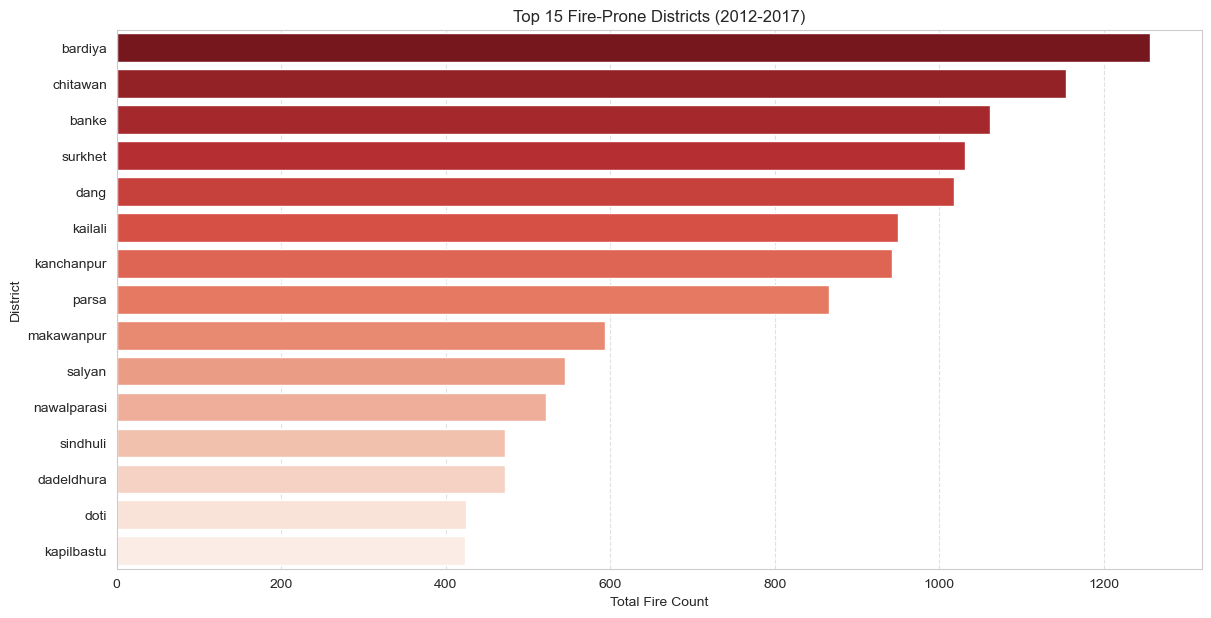

In [ ]:
# Top fire-prone districts
plt.figure(figsize=(14, 7))
district_fires = df_fire_filtered.groupby('DISTRICT')['Fire_Count'].sum().sort_values(ascending=False)[:15]
sns.barplot(x=district_fires.values, y=district_fires.index, palette='Reds_r')
plt.title('Top 15 Fire-Prone Districts (2012-2017)')
plt.xlabel('Total Fire Count')
plt.ylabel('District')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import plotly.express as px

# Aggregate fire counts by year
annual_fire_counts = df_fire_filtered.groupby('YEAR', as_index=False)['Fire_Count'].sum()

# Create the bar chart without text labels
fig_annual = px.bar(
    annual_fire_counts,
    x='YEAR',
    y='Fire_Count',
    labels={'Fire_Count': 'Total Fire Count', 'YEAR': 'Year'},
    color='Fire_Count',
    color_continuous_scale='OrRd',
    title='Annual Forest Fire Count in Nepal (2012–2017)'
)

# Customize the layout
fig_annual.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis_title='Total Fire Count',
    plot_bgcolor='white',
    hovermode='x unified'
)

# Display the figure
fig_annual.show()




In [ ]:
# Calculate average fire counts by month
monthly_avg_fire = df_fire_filtered.groupby('MONTH', as_index=False)['Fire_Count'].mean()

# Define month names for better readability
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg_fire['Month_Name'] = monthly_avg_fire['MONTH'].apply(lambda x: month_names[x - 1])

# Create the line chart
fig_monthly = px.line(
    monthly_avg_fire,
    x='Month_Name',
    y='Fire_Count',
    markers=True,
    labels={'Fire_Count': 'Average Fire Count', 'Month_Name': 'Month'},
    title='Average Monthly Fire Occurrence',
    color_discrete_sequence=['firebrick']
)

# Customize the layout
fig_monthly.update_layout(
    yaxis_title='Average Fire Count',
    xaxis_title='Month',
    plot_bgcolor='white',
    hovermode='x unified'
)

# Display the figure
fig_monthly.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_7384\4046573783.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:

# Aggregate fire counts by year and month
monthly_fire_counts = df_fire_filtered.groupby(['YEAR', 'MONTH'], as_index=False)['Fire_Count'].sum()

# Create a 'Date' column for plotting
monthly_fire_counts['Date'] = pd.to_datetime(monthly_fire_counts[['YEAR', 'MONTH']].assign(DAY=1))

# Sort by date
monthly_fire_counts.sort_values('Date', inplace=True)

# Plot the monthly fire counts
fig = px.line(
    monthly_fire_counts,
    x='Date',
    y='Fire_Count',
    title='Monthly Forest Fire Counts in Nepal (2012–2017)',
    labels={'Fire_Count': 'Fire Count', 'Date': 'Date'},
    markers=True
)

# Customize the layout
fig.update_traces(line=dict(color='firebrick', width=2), marker=dict(size=6))
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Fire Count',
    hovermode='x unified',
    template='plotly_white'
)

# Display the figure
fig.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_7384\568159235.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
pip install  ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, ToggleButtons
import seaborn as sns

# Load and prepare ALL years (2012-2017)
file_path = r'C:\Users\Dell\Desktop\Omdena\forsestfire_ml\data\processed\combined_fire_climate.csv'
df = pd.read_csv(file_path)
df['MONTH_YEAR'] = df['MONTH'].apply(lambda x: f"{x:02d}") + '-' + df['YEAR'].astype(str)
districts = sorted(df['DISTRICT'].unique())

def plot_fire_trends(district, view='Monthly'):
    # Filter data for selected district
    district_data = df[df['DISTRICT'] == district]
    
    if view == 'Monthly':
        # Monthly view - only showing months with fires
        plot_data = district_data[district_data['Fire_Count'] > 0]
        if plot_data.empty:
            print(f"No fire records found for {district} (2012-2017)")
            return
            
        plt.figure(figsize=(16, 6))
        ax = sns.barplot(x='MONTH_YEAR', y='Fire_Count', 
                         data=plot_data.sort_values(['YEAR', 'MONTH']),
                         palette='OrRd', edgecolor='black')
        
        plt.title(f'Monthly Fire Occurrences in {district} (2012-2017)\nActive fire months only', 
                 fontsize=14, pad=15)
        plt.xlabel('Month-Year (MM-YYYY)')
        plt.ylabel('Fire Count')
        plt.xticks(rotation=45, ha='right')
        
    else:  # Yearly view
        yearly_data = district_data.groupby('YEAR')['Fire_Count'].sum().reset_index()
        
        plt.figure(figsize=(12, 5))
        ax = sns.barplot(x='YEAR', y='Fire_Count', 
                         data=yearly_data,
                         color='darkred', edgecolor='black')
        
        plt.title(f'Annual Fire Summary for {district} (2012-2017)', fontsize=14, pad=15)
        plt.xlabel('Year')
        plt.ylabel('Total Fire Count')
    
    # Add value labels
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", 
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Interactive widget
interact(plot_fire_trends,
         district=Dropdown(options=districts, description='District:'),
         view=ToggleButtons(options=['Monthly', 'Yearly'], 
                           description='View Mode:'));

interactive(children=(Dropdown(description='District:', options=('arghakhanchi', 'baglung', 'baitadi', 'bajang…

In [ ]:
df

YEAR  MONTH      DISTRICT   LAT   LON    Prep  AvgTemp  MaxTemp  \
0     2012      1  arghakhanchi  27.9  83.2   36.46    12.78    19.09   
1     2012      2  arghakhanchi  27.9  83.2   10.93    16.40    23.90   
2     2012      3  arghakhanchi  27.9  83.2   17.71    20.72    28.99   
3     2012      4  arghakhanchi  27.9  83.2   14.04    26.91    34.38   
4     2012      5  arghakhanchi  27.9  83.2    7.53    30.94    38.31   
...    ...    ...           ...   ...   ...     ...      ...      ...   
4459  2017      8      udayapur  26.9  86.5  319.82    26.48    29.18   
4460  2017      9      udayapur  26.9  86.5  140.47    25.77    28.63   
4461  2017     10      udayapur  26.9  86.5   56.04    23.94    27.95   
4462  2017     11      udayapur  26.9  86.5    0.37    20.36    25.92   
4463  2017     12      udayapur  26.9  86.5    0.00    17.58    24.30   

      Humidity  WindSpeed  Brightness  Confidence  ThermalData    FRP  \
0        51.21       2.23    0.000000    0.000000     0.000000    0.0   
1        39.39       2.85    0.000000    0.000000     0.000000    0.0   
2        28.13       3.04    0.000000    0.000000     0.000000    0.0   
3        27.54       3.61  317.085714   61.742857   302.085714  384.8   
4        19.34       3.14  315.409091   55.727273   300.672727  160.5   
...        ...        ...         ...         ...          ...    ...   
4459     88.33       2.40    0.000000    0.000000     0.000000    0.0   
4460     88.90       2.41    0.000000    0.000000     0.000000    0.0   
4461     77.69       1.93    0.000000    0.000000     0.000000    0.0   
4462     64.21       1.69    0.000000    0.000000     0.000000    0.0   
4463     52.85       1.68    0.000000    0.000000     0.000000    0.0   

      Fire_Count MONTH_YEAR  
0            0.0    01-2012  
1            0.0    02-2012  
2            0.0    03-2012  
3           35.0    04-2012  
4           11.0    05-2012  
...          ...        ...  
4459         0.0    08-2017  
4460         0.0    09-2017  
4461         0.0    10-2017  
4462         0.0    11-2017  
4463         0.0    12-2017  

[4464 rows x 16 columns]

In [ ]:
# Load and prepare ALL years (2012-2017)
file_path = r'C:\Users\Dell\Desktop\Omdena\forsestfire_ml\data\processed\combined_fire_climate.csv'
df = pd.read_csv(file_path)
df

YEAR  MONTH      DISTRICT   LAT   LON    Prep  AvgTemp  MaxTemp  \
0     2012      1  arghakhanchi  27.9  83.2   36.46    12.78    19.09   
1     2012      2  arghakhanchi  27.9  83.2   10.93    16.40    23.90   
2     2012      3  arghakhanchi  27.9  83.2   17.71    20.72    28.99   
3     2012      4  arghakhanchi  27.9  83.2   14.04    26.91    34.38   
4     2012      5  arghakhanchi  27.9  83.2    7.53    30.94    38.31   
...    ...    ...           ...   ...   ...     ...      ...      ...   
4459  2017      8      udayapur  26.9  86.5  319.82    26.48    29.18   
4460  2017      9      udayapur  26.9  86.5  140.47    25.77    28.63   
4461  2017     10      udayapur  26.9  86.5   56.04    23.94    27.95   
4462  2017     11      udayapur  26.9  86.5    0.37    20.36    25.92   
4463  2017     12      udayapur  26.9  86.5    0.00    17.58    24.30   

      Humidity  WindSpeed  Brightness  Confidence  ThermalData    FRP  \
0        51.21       2.23    0.000000    0.000000     0.000000    0.0   
1        39.39       2.85    0.000000    0.000000     0.000000    0.0   
2        28.13       3.04    0.000000    0.000000     0.000000    0.0   
3        27.54       3.61  317.085714   61.742857   302.085714  384.8   
4        19.34       3.14  315.409091   55.727273   300.672727  160.5   
...        ...        ...         ...         ...          ...    ...   
4459     88.33       2.40    0.000000    0.000000     0.000000    0.0   
4460     88.90       2.41    0.000000    0.000000     0.000000    0.0   
4461     77.69       1.93    0.000000    0.000000     0.000000    0.0   
4462     64.21       1.69    0.000000    0.000000     0.000000    0.0   
4463     52.85       1.68    0.000000    0.000000     0.000000    0.0   

      Fire_Count  
0            0.0  
1            0.0  
2            0.0  
3           35.0  
4           11.0  
...          ...  
4459         0.0  
4460         0.0  
4461         0.0  
4462         0.0  
4463         0.0  

[4464 rows x 15 columns]

In [16]:
import plotly.express as px
import pandas as pd

# Create Year-Month column for animation
df['YearMonth'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str).str.zfill(2)

fig = px.scatter_mapbox(df,
                        lat='LAT',
                        lon='LON',
                        color='Fire_Count',
                        size='Fire_Count',
                        size_max=20,
                        animation_frame='YearMonth',  
                        hover_name='DISTRICT',
                        hover_data={
                            'Fire_Count': True,
                            
                        },
                        zoom=5,
                        center={'lat': 28.0, 'lon': 84.0},
                        title='Monthly Fire Count Across Districts (2012–2017)',
                        color_continuous_scale='Viridis',
                        range_color=[0, df['Fire_Count'].max()])



fig.update_layout(mapbox_style="open-street-map",
                  margin={"r": 0, "t": 40, "l": 0, "b": 0})

fig.show()


In [11]:
import plotly.express as px

# Optional: Normalize Fire_Confidence if needed
min_conf = df["Confidence"].min()
if min_conf < 0:
    df["Confidence_Size"] = df["Confidence"] + abs(min_conf) + 1
else:
    df["Confidence_Size"] = df["Confidence"]

fig = px.scatter_mapbox(
    df,
    lat="LAT",
    lon="LON",
    size="Confidence_Size",       # Size adjusted to ensure non-negative
    color="Confidence",           # Use real values for coloring
    animation_frame="MONTH",
    hover_name="DISTRICT",
    hover_data={"Confidence": True},
    size_max=15,
    zoom=5,
    mapbox_style="open-street-map",
    title="Monthly Fire Confidence Across Districts of Nepal (2012–2017)",
    color_continuous_scale="OrRd",  # Orange-Red for fire variables
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    sliders=[{"currentvalue": {"prefix": "Month: "}}],
)

fig.show()


Extreme Weather Event Frequency and Intensity

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='LAT', y='LON', z='Fire_Count',
                    color='MaxTemp', size='FRP', hover_data=['DISTRICT', 'MONTH'])
fig.update_layout(title='3D Visualization of Fires and Climate Data')
fig.show()


 Wind Speed vs. FRP
-How wind affects fire radiative power (fire intensity).

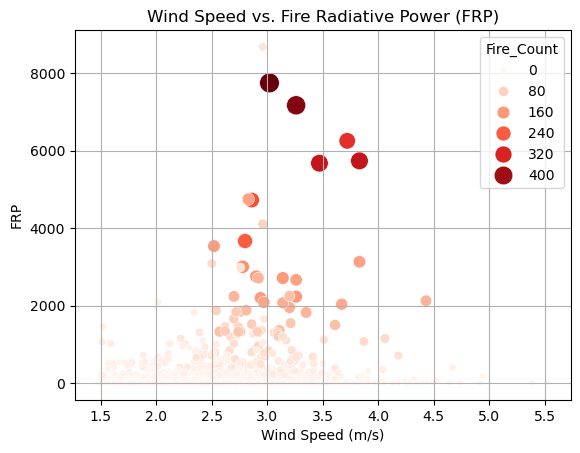

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='WindSpeed', y='FRP', hue='Fire_Count', palette='Reds', size='Fire_Count', sizes=(20, 200))
plt.title("Wind Speed vs. Fire Radiative Power (FRP)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("FRP")
plt.grid(True)
plt.show()


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(r'C:\Users\Dell\Desktop\Omdena\project\capstone-project-bnusuwal\data\processed\combined_fire_climate.csv')

# Display the first few rows to understand the structure (optional)
print(df.head())



   YEAR  MONTH      DISTRICT   LAT   LON   Prep  AvgTemp  MaxTemp  Humidity  \
0  2012      1  arghakhanchi  27.9  83.2  36.46    12.78    19.09     51.21   
1  2012      2  arghakhanchi  27.9  83.2  10.93    16.40    23.90     39.39   
2  2012      3  arghakhanchi  27.9  83.2  17.71    20.72    28.99     28.13   
3  2012      4  arghakhanchi  27.9  83.2  14.04    26.91    34.38     27.54   
4  2012      5  arghakhanchi  27.9  83.2   7.53    30.94    38.31     19.34   

   WindSpeed  Brightness  Confidence  ThermalData    FRP  Fire_Count  
0       2.23    0.000000    0.000000     0.000000    0.0         0.0  
1       2.85    0.000000    0.000000     0.000000    0.0         0.0  
2       3.04    0.000000    0.000000     0.000000    0.0         0.0  
3       3.61  317.085714   61.742857   302.085714  384.8        35.0  
4       3.14  315.409091   55.727273   300.672727  160.5        11.0  


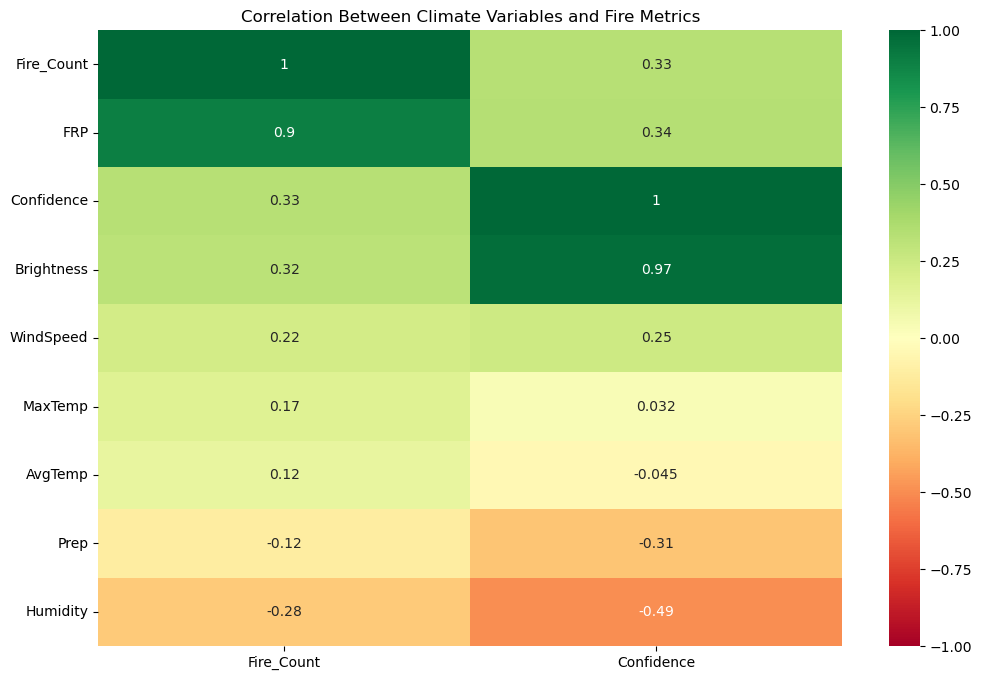

In [34]:
# Select relevant columns
fire_climate_vars = ['Prep', 'AvgTemp', 'MaxTemp', 'Humidity', 'WindSpeed', 
                    'Brightness', 'Confidence', 'FRP', 'Fire_Count']

# Create correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[fire_climate_vars].corr()[['Fire_Count', 'Confidence']].sort_values(by='Fire_Count', ascending=False), 
            annot=True, cmap='RdYlGn', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Climate Variables and Fire Metrics')
plt.show()

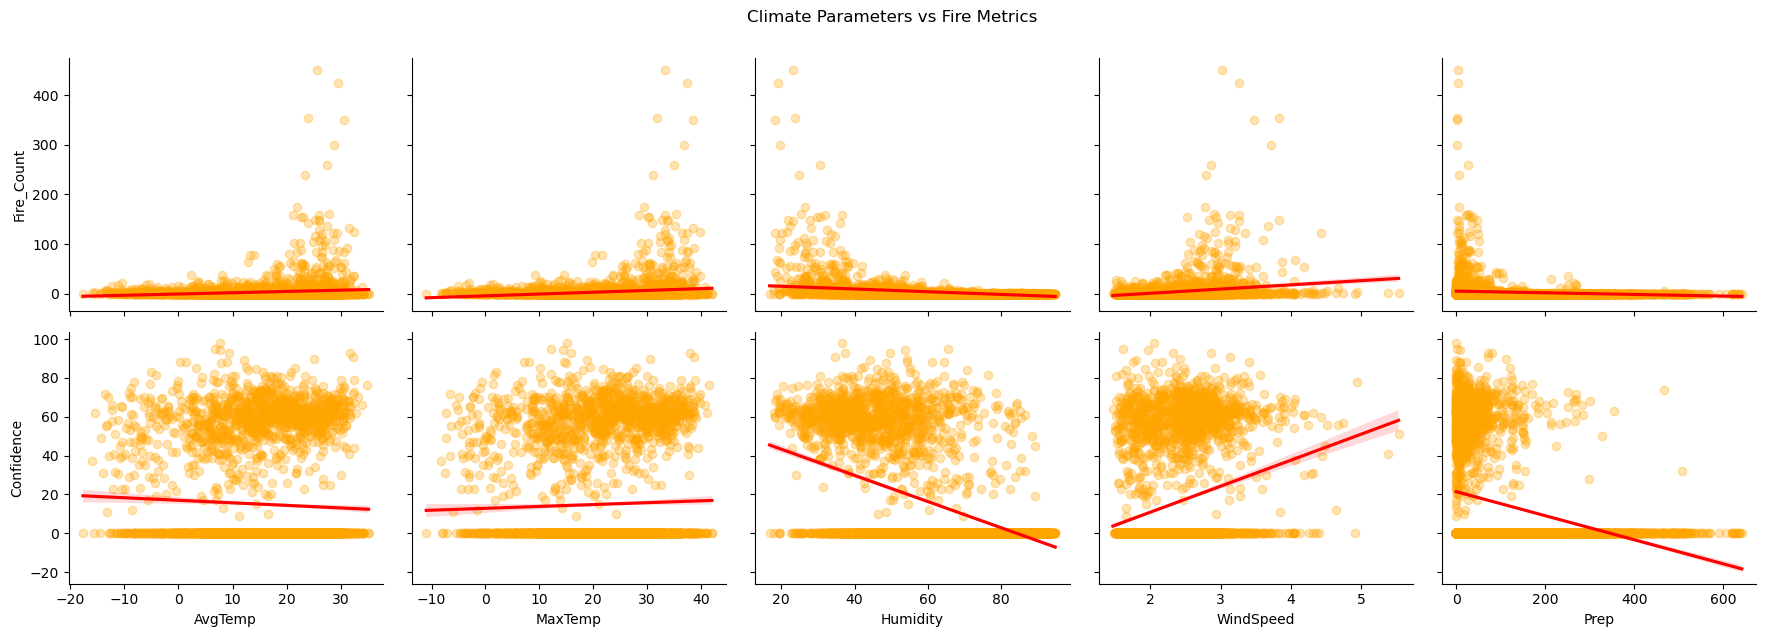

In [35]:
g = sns.PairGrid(df, y_vars=['Fire_Count', 'Confidence'], 
                x_vars=['AvgTemp', 'MaxTemp', 'Humidity', 'WindSpeed', 'Prep'],
                height=3, aspect=1.2)
g.map(sns.regplot, scatter_kws={'alpha':0.3, 'color':'orange'}, 
      line_kws={'color':'red'})
g.fig.suptitle('Climate Parameters vs Fire Metrics', y=1.05)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8328\3671825886.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



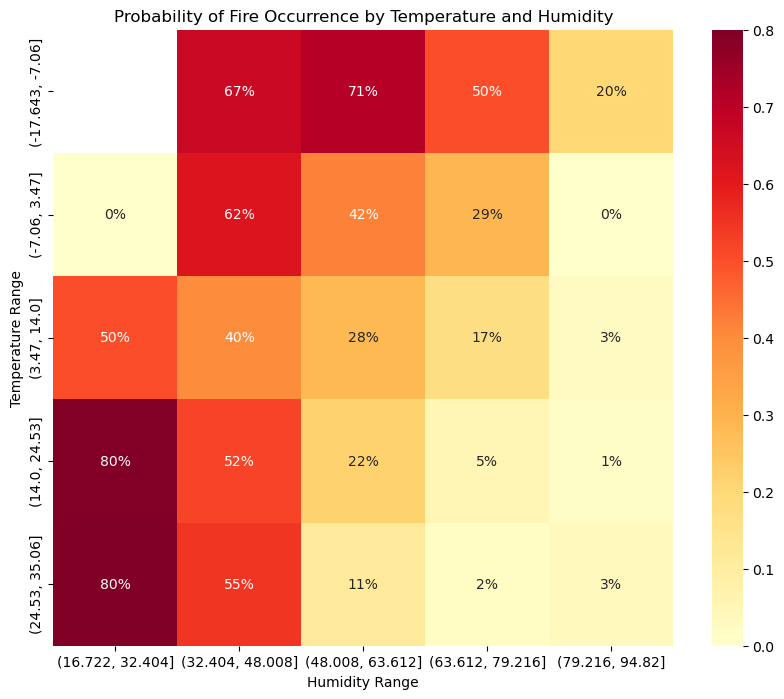

In [39]:
# Create bins for climate variables
df['Temp_bin'] = pd.cut(df['AvgTemp'], bins=5)
df['Humidity_bin'] = pd.cut(df['Humidity'], bins=5)

# Calculate fire probability
prob_table = df.groupby(['Temp_bin', 'Humidity_bin'])['Fire_Count'].apply(
    lambda x: (x > 0).mean()).unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(prob_table, annot=True, fmt=".0%", cmap="YlOrRd")
plt.title('Probability of Fire Occurrence by Temperature and Humidity')
plt.xlabel('Humidity Range')
plt.ylabel('Temperature Range')
plt.show()